In [1]:
%matplotlib inline

In [2]:
# -*- coding: utf-8 -*-
import os
import sys
import glob
import dlib
import cv2
import matplotlib.pyplot as plt

In [3]:
# options用于设置训练的参数和模式
options = dlib.simple_object_detector_training_options()
# Since faces are left/right symmetric we can tell the trainer to train a
# symmetric detector.  This helps it get the most value out of the training
# data.
options.add_left_right_image_flips = True
# 支持向量机的C参数，通常默认取为5.自己适当更改参数以达到最好的效果
options.C = 5
# 线程数，你电脑有4核的话就填4
options.num_threads = 8
options.be_verbose = True

In [4]:
# 获取路径
train_folder = './data/cats_train/'
test_folder = './data/cats_test/'
train_xml_path = train_folder + 'cat.xml'
test_xml_path = test_folder + 'cats.xml'

print("training file path:" + train_xml_path)
# print(train_xml_path)
print("testing file path:" + test_xml_path)
# print(test_xml_path)

training file path:./data/cats_train/cat.xml
testing file path:./data/cats_test/cats.xml


In [5]:
# 开始训练
print("start training:")
dlib.train_simple_object_detector(train_xml_path, 'detector.svm', options)

print("")
print("Training accuracy: {}".format(
    dlib.test_simple_object_detector(train_xml_path, "detector.svm")))

print("Testing accuracy: {}".format(
    dlib.test_simple_object_detector(test_xml_path, "detector.svm")))

start training:

Training accuracy: precision: 1, recall: 0.722222, average precision: 0.722222
Testing accuracy: precision: 1, recall: 0.727273, average precision: 0.727273


In [6]:
detector = dlib.simple_object_detector("detector.svm")

Processing file: ./data/cats_test\1.jpg
Number of faces detected: 0
Processing file: ./data/cats_test\10.jpg
Number of faces detected: 1
face 0; left 294; top 45; right 390; bottom 131


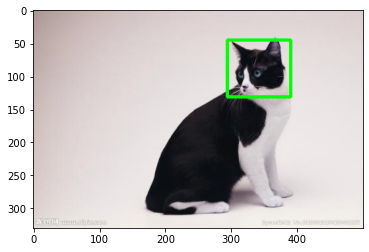

Processing file: ./data/cats_test\2.jpg
Number of faces detected: 1
face 0; left 194; top 35; right 393; bottom 214


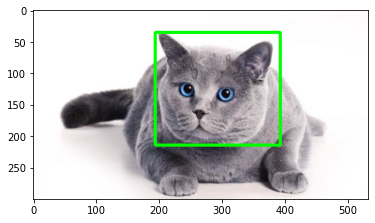

Processing file: ./data/cats_test\3.jpg
Number of faces detected: 1
face 0; left 154; top -25; right 353; bottom 174


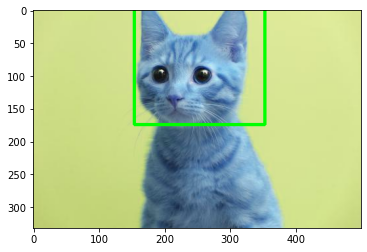

Processing file: ./data/cats_test\4.jpg
Number of faces detected: 0
Processing file: ./data/cats_test\5.jpg
Number of faces detected: 1
face 0; left 19; top 19; right 135; bottom 123


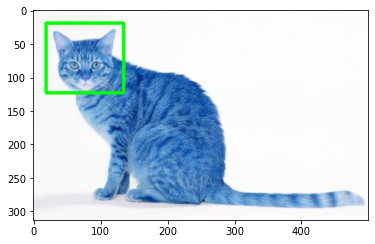

Processing file: ./data/cats_test\6.jpg
Number of faces detected: 1
face 0; left 18; top 66; right 257; bottom 281


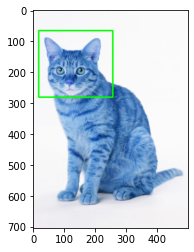

Processing file: ./data/cats_test\7.jpg
Number of faces detected: 1
face 0; left 161; top 18; right 400; bottom 233


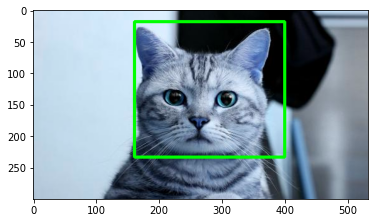

Processing file: ./data/cats_test\8.jpg
Number of faces detected: 1
face 0; left 145; top 12; right 311; bottom 161


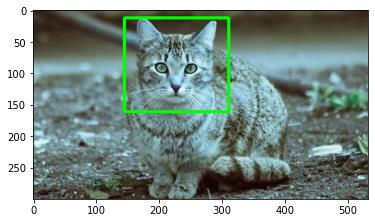

Processing file: ./data/cats_test\9.jpg
Number of faces detected: 1
face 0; left 170; top 26; right 266; bottom 112


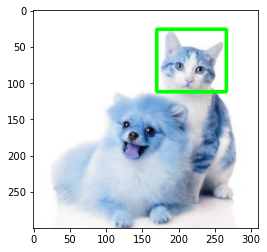

In [7]:
for f in glob.glob(test_folder+'*.jpg'):
    print("Processing file: {}".format(f))
    img = cv2.imread(f, cv2.IMREAD_COLOR)
    b, g, r = cv2.split(img)
    img2 = cv2.merge([r, g, b])
    dets = detector(img2)
    print("Number of faces detected: {}".format(len(dets)))
    for index, face in enumerate(dets):
        print('face {}; left {}; top {}; right {}; bottom {}'.format(index, face.left(), face.top(), face.right(), face.bottom()))

        left = face.left()
        top = face.top()
        right = face.right()
        bottom = face.bottom()
        cv2.rectangle(img, (left, top), (right, bottom), (0, 255, 0), 3)
        # cv2.namedWindow(f, cv2.WINDOW_AUTOSIZE)
        # cv2.imshow(f, img)
        plt.imshow(img)
        plt.show()